In [22]:
# IMPORT MODULES
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import numpy as np 
import datetime

In [29]:
# OPEN THE MAQIT TERMINUS POSITION CSV FILE AND PRINT THE INDEX POSITION OF THE FIRST OBSERVATION IN 2016
MAQIT_CSV = pd.read_csv(r"R:/KOGE_BUGT/github/data/maqit_output_2015_2024.csv", skiprows=1, parse_dates= {"Date" : ["Year","Month","Day"]})
MAQIT_CSV.sort_values(by='Date', ascending = True, inplace = True) 
january_2016_index = MAQIT_CSV.index[MAQIT_CSV['Date'] == '2016-01-12'].tolist()
print(f"Index of the row with the first observation of 2016 is: {january_2016_index[0]}")

Index of the row with the first observation of 2016 is: 11


In [32]:
# CALCULATE THE RELATIVE TERMINUS POSITION TO THE FIRST OBSERVATION OF 2016, USING THE INDEX POSITION PRINTED ABOVE
MAQIT_CSV['TP_RELATIVE_TO_JAN_2016'] = MAQIT_CSV['Terminus Position on flowline'] - MAQIT_CSV['Terminus Position on flowline'].iloc[11]
jan_2016 = MAQIT_CSV['Date'][11]
jan_2016_label = jan_2016.strftime('%d/%m/%Y') 
print(f"The date label for the first observation of 2016 is: {jan_2016_label}")

The date label for the first observation of 2016 is: 12/01/2016


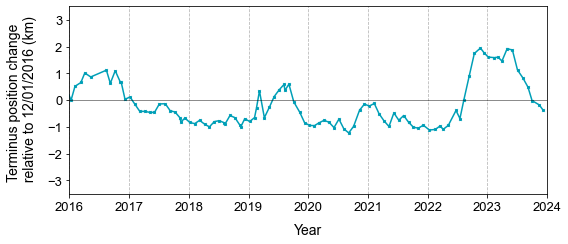

In [35]:
# PLOT THE CHANGE IN TERMINUS POSITION RELATIVE TO THE FIRST OBSERVATION OF 2016
plt.rcParams["font.family"] = "Arial"
plt.figure(figsize=(8, 3.5))
plt.plot(MAQIT_CSV['Date'], MAQIT_CSV['TP_RELATIVE_TO_JAN_2016']/1000, color='#009fb7', linewidth=1.5)
plt.scatter(MAQIT_CSV['Date'], MAQIT_CSV['TP_RELATIVE_TO_JAN_2016']/1000, color='#009fb7', s=6, marker='x')
plt.xlabel('Year', labelpad=10, fontsize=14)
plt.ylabel(f'Terminus position change \n relative to {jan_2016_label} (km)', labelpad=10, fontsize=14)
plt.ylim(-3.5, 3.5)
plt.grid(axis='x', linestyle='--', alpha=0.9)
plt.xlim(pd.to_datetime('2016-01-01'), pd.to_datetime('2024-01-01'))
plt.axhline(0, color='black', linewidth=0.5, linestyle='-', alpha=0.9)
plt.tick_params(axis='y', labelsize=13)
plt.tick_params(axis='x', labelsize=13)
plt.tight_layout()
plt.show() 